In [1]:
# Data Management
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")


from sklearn.model_selection import train_test_split

# Hyperparameter selection
from sklearn.model_selection import GridSearchCV

# Feature Selection
from sklearn.feature_selection import SelectKBest, chi2, RFE

# Modeling
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# Model Evaluation
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, roc_auc_score
import itertools


# Cleaning

In [2]:
data = pd.read_csv('Surgery_Data.csv')

In [3]:
def data_cleaning(data):

    # converting into binary variables
    data[['Risk1Yr', 'PRE7', 'PRE8', 'PRE9', 'PRE10', 'PRE11', 'PRE17', 'PRE19', 'PRE25', 'PRE30', 'PRE32']] = \
    (data[[ 'Risk1Yr', 'PRE7', 'PRE8', 'PRE9', 'PRE10', 'PRE11', 'PRE17', 'PRE19', 'PRE25', 'PRE30', 'PRE32']] == 'T').astype(int)

    # converting into categorical variables
    data['DGN'] = data.DGN.str[-1:].astype(int)
    data['PRE6'] = data.PRE6.str[-1:].astype(int)
    data['PRE14'] = data.PRE14.str[-1:].astype(int)

    # renaming data variables
    col_names = {'Risk1Yr': 'Death_1yr', 'DGN': 'Diagnosis', 'PRE4': 'FVC', 'PRE5': 'FEV1', 'PRE6': 'Performance', 
                'PRE7': 'Pain', 'PRE8': 'Haemoptysis', 'PRE9': 'Dyspnoea', 'PRE10': 'Cough', 'PRE11': 'Weakness',
                'PRE14': 'Tumor_Size', 'PRE17': 'Diabetes_Mellitus', 'PRE19': 'MI_6mo', 'PRE25': 'PAD',
                'PRE30': 'Smoking', 'PRE32': 'Asthma', 'AGE': 'Age'}
    data = data.rename(index=str, columns=col_names)

    df = data[data.Age > 30]
    df = data[data.FEV1 < 8]

    print('The original data contains \033[1m' + str(len(data)) + '\033[0m observations, while after the applied changes there are \033[1m' + str(len(df)) + '\033[0m left.')
    
    return df

In [4]:
data = data_cleaning(data)

The original data contains 471 observations, while after the applied changes there are 456 left.


In [5]:
data.head()

,Death_1yr,Diagnosis,FVC,FEV1,Performance,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,Tumor_Size,Diabetes_Mellitus,MI_6mo,PAD,Smoking,Asthma,Age
0,0,2,2.88,2.16,1,0,0,0,1,1,4,0,0,0,1,0,60
1,0,3,3.40,1.88,0,0,0,0,0,0,2,0,0,0,1,0,51
2,0,3,2.76,2.08,1,0,0,0,1,0,1,0,0,0,1,0,59
3,0,3,3.68,3.04,0,0,0,0,0,0,1,0,0,0,0,0,54
4,1,3,2.44,0.96,2,0,1,0,1,1,1,0,0,0,1,0,73


# X, y, train_test_split

In [6]:
X, y = data.drop(['Death_1yr', 'MI_6mo', 'Asthma'], axis=1), data['Death_1yr']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

# Initial models to be used

In [7]:
lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

# Hyperparameters

In [8]:
def hyperpars(model, parameters):
    
    param_search = GridSearchCV(model, parameters)
    param_search.fit(X_train, y_train)
    
    return param_search.best_estimator_

**Hyperparameters for LogisticRegression()**

In [9]:
def logistic(model):
    
    reg = [0.1, 1, 10]
    weight = ['balanced', None]
    
    param_lr = dict(C=reg, class_weight=weight)
    lr_hyper = hyperpars(model, param_lr)
    
    print('\033[1m Selected hyperparameters for Logistic Regression are: \033[0m \n\n', lr_hyper)
    
    return lr_hyper

In [10]:
lr_hyper = logistic(lr)

 Selected hyperparameters for Logistic Regression are:  

 LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


**Hyperparameters for DecisionTreeClassifier()**

In [11]:
def tree_forest(model):
    
    weight = ['balanced', None]
    criterion = ['gini', 'entropy']
    depth = [i for i in range(5,21,1)]
    samples = [i for i in range(20,500,10)]
    
    param_dt = dict(class_weight=weight, criterion=criterion, max_depth=depth, min_samples_leaf=samples)
    hyper = hyperpars(model, param_dt)
    
    if model==dt:
        print('\033[1m Selected hyperparameters for Decision Tree are: \033[0m \n\n', hyper)
    if model==rf:
        print('\033[1m Selected hyperparameters for Random Forest are: \033[0m \n\n', hyper)
        
    return hyper

In [12]:
dt_hyper = tree_forest(dt)

 Selected hyperparameters for Decision Tree are:  

 DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=130, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [13]:
rf_hyper = tree_forest(rf)

 Selected hyperparameters for Random Forest are:  

 RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=5, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=120,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)


# Feature Importance

In [14]:
def feature_selection(model):
    
    model.fit(X_train, y_train)
    
    if model==lr:
        print('\033[1m Default Logistic Regression \033[0m')
        relative_importances = pd.DataFrame(index=list(X), data=model.coef_[0], columns=["importance"])
        
    if model==lr_hyper:
        print('\033[1m Modified Logistic Regression \033[0m')
        relative_importances = pd.DataFrame(index=list(X), data=model.coef_[0], columns=["importance"])
        
    if model==dt:
        print('\033[1m Default Decision Tree \033[0m')
        relative_importances = pd.DataFrame(index=list(X), data=model.feature_importances_, columns=["importance"])
    
    if model==dt_hyper:
        print('\033[1m Modified Decision Tree \033[0m')
        relative_importances = pd.DataFrame(index=list(X), data=model.feature_importances_, columns=["importance"])
        
    if model==rf:
        print('\033[1m Default Random Forest \033[0m')
        relative_importances = pd.DataFrame(index=list(X), data=model.feature_importances_, columns=["importance"])
    
    if model==rf_hyper:
        print('\033[1m Modified Random Forest \033[0m')
        relative_importances = pd.DataFrame(index=list(X), data=model.feature_importances_, columns=["importance"])
    
    coeff = relative_importances[relative_importances.importance>0.01]
    coeff.columns = [str(model)]
    
    return coeff

In [15]:
df_lr = feature_selection(lr)
df_lr

 Default Logistic Regression 


,"LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1, penalty='l2', random_state=None, solver='liblinear', tol=0.0001, verbose=0, warm_start=False)"
Diagnosis,0.400685
Performance,0.504368
Pain,0.389567
Haemoptysis,0.520769
Dyspnoea,0.228012
Cough,0.111941
Weakness,0.271518
Tumor_Size,0.393414
Diabetes_Mellitus,0.561155
PAD,0.422021


In [16]:
df_lr_hyper = feature_selection(lr_hyper)
df_lr_hyper

 Modified Logistic Regression 


,"LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1, penalty='l2', random_state=None, solver='liblinear', tol=0.0001, verbose=0, warm_start=False)"
Diagnosis,0.225000
Performance,0.329158
Pain,0.148755
Haemoptysis,0.246682
Dyspnoea,0.062109
Cough,0.120101
Weakness,0.153114
Tumor_Size,0.274970
Diabetes_Mellitus,0.204649
PAD,0.088910


In [17]:
df_dt = feature_selection(dt)
df_dt

 Default Decision Tree 


,"DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None, max_features=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, presort=False, random_state=None, splitter='best')"
Diagnosis,0.048535
FVC,0.131833
FEV1,0.403899
Haemoptysis,0.069455
Dyspnoea,0.010566
Cough,0.016100
Weakness,0.035743
Tumor_Size,0.031885
Diabetes_Mellitus,0.011176
Smoking,0.031454


In [18]:
df_dt_hyper = feature_selection(dt_hyper)
df_dt_hyper

 Modified Decision Tree 


,"DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=5, max_features=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=130, min_samples_split=2, min_weight_fraction_leaf=0.0, presort=False, random_state=None, splitter='best')"
FVC,1.0


In [19]:
df_rf = feature_selection(rf)
df_rf

 Default Random Forest 


,"RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini', max_depth=None, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1, oob_score=False, random_state=None, verbose=0, warm_start=False)"
Diagnosis,0.117906
FVC,0.173419
FEV1,0.238913
Performance,0.055707
Pain,0.022924
Haemoptysis,0.026274
Dyspnoea,0.011831
Cough,0.025131
Weakness,0.032243
Tumor_Size,0.071192


In [20]:
df_rf_hyper = feature_selection(rf_hyper)
df_rf_hyper

 Modified Random Forest 


,"RandomForestClassifier(bootstrap=True, class_weight='balanced', criterion='gini', max_depth=5, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=120, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1, oob_score=False, random_state=None, verbose=0, warm_start=False)"


**Collecting all results into one DataFrame:** https://pandas.pydata.org/pandas-docs/version/0.20/merging.html

In [21]:
pd.concat([df_lr, df_lr_hyper, df_dt, df_dt_hyper, df_rf, df_rf_hyper], axis=1)

C:\Users\Anna Danielyan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """Entry point for launching an IPython kernel.


,"LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1, penalty='l2', random_state=None, solver='liblinear', tol=0.0001, verbose=0, warm_start=False)","LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1, penalty='l2', random_state=None, solver='liblinear', tol=0.0001, verbose=0, warm_start=False)","DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None, max_features=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, presort=False, random_state=None, splitter='best')","DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=5, max_features=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=130, min_samples_split=2, min_weight_fraction_leaf=0.0, presort=False, random_state=None, splitter='best')","RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini', max_depth=None, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1, oob_score=False, random_state=None, verbose=0, warm_start=False)","RandomForestClassifier(bootstrap=True, class_weight='balanced', criterion='gini', max_depth=5, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=120, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1, oob_score=False, random_state=None, verbose=0, warm_start=False)"
Age,NaN,NaN,0.201604,NaN,0.177677,NaN
Cough,0.111941,0.120101,0.016100,NaN,0.025131,NaN
Diabetes_Mellitus,0.561155,0.204649,0.011176,NaN,0.026360,NaN
Diagnosis,0.400685,0.225000,0.048535,NaN,0.117906,NaN
Dyspnoea,0.228012,0.062109,0.010566,NaN,0.011831,NaN
FEV1,NaN,NaN,0.403899,NaN,0.238913,NaN
FVC,NaN,NaN,0.131833,1.0,0.173419,NaN
Haemoptysis,0.520769,0.246682,0.069455,NaN,0.026274,NaN
PAD,0.422021,0.088910,NaN,NaN,NaN,NaN
Pain,0.389567,0.148755,NaN,NaN,0.022924,NaN


# Model Evaluation

In [22]:
def evaluation(model, title):

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    classes = ['Survived', 'Died']

    acc = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    
    scores = pd.DataFrame({'Accuracy': acc, 'ROC_AUC': roc_auc,
                       'Recall': recall, 'Precision': precision}, index=[title])
    
    print('\n \t \033[1m', title)
    
    print('\n \033[1m Classification Report \n \033[0m', classification_report(y_test, y_pred, target_names=classes))

    cnf_matrix = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(10,5))
    sns.heatmap(cnf_matrix, cmap=plt.cm.Blues, center=0, annot=True, annot_kws={'size': 26}, xticklabels=classes, yticklabels=classes);


    plt.tight_layout()
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

    plt.show()
    
    return scores.transpose()

C:\Users\Anna Danielyan\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)



 	  Default Logistic Regression

  Classification Report 
               precision    recall  f1-score   support

   Survived       0.79      1.00      0.88        73
       Died       0.00      0.00      0.00        19

avg / total       0.63      0.79      0.70        92



C:\Users\Anna Danielyan\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


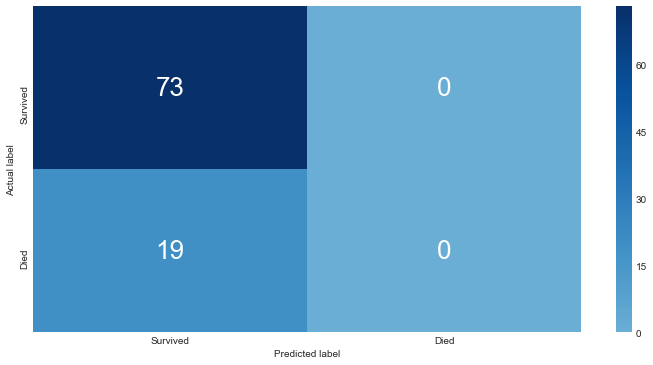

In [23]:
sc_lr = evaluation(lr, 'Default Logistic Regression')

C:\Users\Anna Danielyan\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Anna Danielyan\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)



 	  Modified Logistic Regression

  Classification Report 
               precision    recall  f1-score   support

   Survived       0.79      1.00      0.88        73
       Died       0.00      0.00      0.00        19

avg / total       0.63      0.79      0.70        92



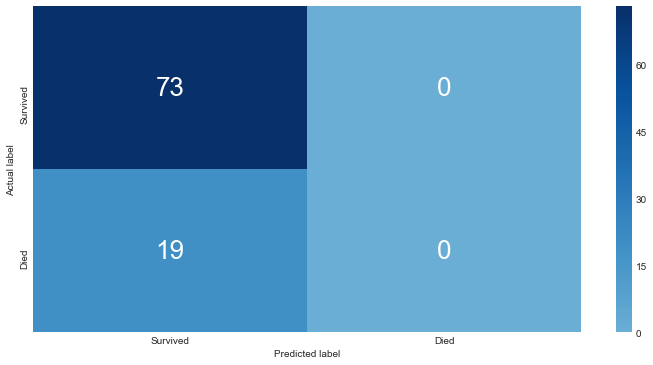

In [24]:
sc_lr_hyper = evaluation(lr_hyper, 'Modified Logistic Regression')


 	  Default Decision Tree

  Classification Report 
               precision    recall  f1-score   support

   Survived       0.81      0.92      0.86        73
       Died       0.33      0.16      0.21        19

avg / total       0.71      0.76      0.73        92



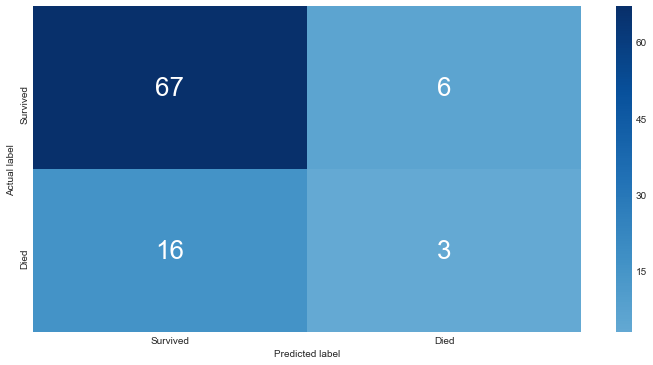

In [25]:
sc_dt = evaluation(dt, 'Default Decision Tree')


 	  Modifed Decision Tree

  Classification Report 
               precision    recall  f1-score   support

   Survived       0.83      0.73      0.77        73
       Died       0.29      0.42      0.34        19

avg / total       0.72      0.66      0.68        92



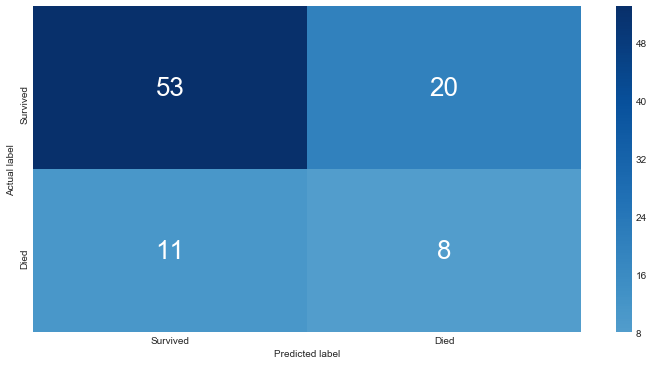

In [26]:
sc_dt_hyper = evaluation(dt_hyper, 'Modifed Decision Tree')


 	  Default Random Forest

  Classification Report 
               precision    recall  f1-score   support

   Survived       0.79      1.00      0.88        73
       Died       0.00      0.00      0.00        19

avg / total       0.63      0.79      0.70        92



C:\Users\Anna Danielyan\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Anna Danielyan\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


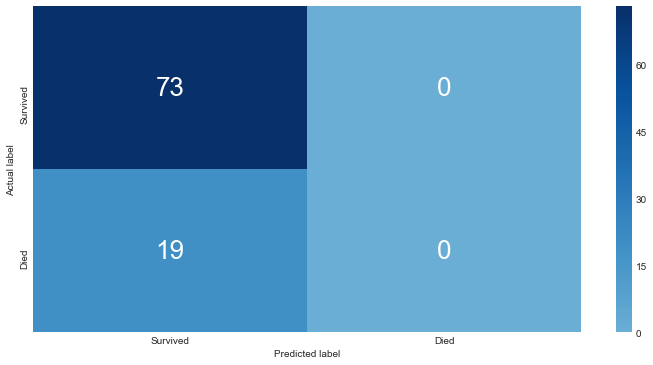

In [27]:
sc_rf = evaluation(rf, 'Default Random Forest')

C:\Users\Anna Danielyan\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)



 	  Modified Random Forest

  Classification Report 
               precision    recall  f1-score   support

   Survived       0.00      0.00      0.00        73
       Died       0.21      1.00      0.34        19

avg / total       0.04      0.21      0.07        92



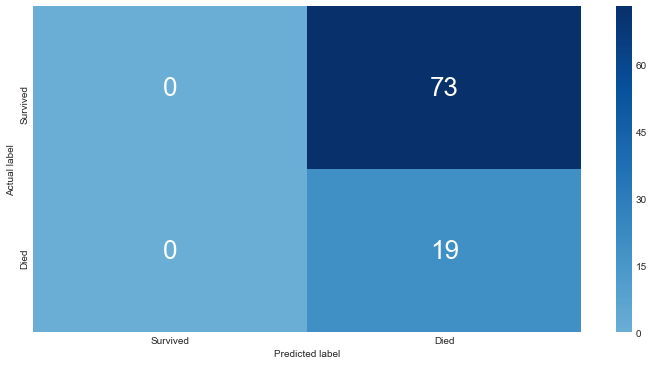

In [28]:
sc_rf_hyper = evaluation(rf_hyper, 'Modified Random Forest')

In [29]:
pd.concat([sc_lr, sc_lr_hyper, sc_dt, sc_dt_hyper, sc_rf, sc_rf_hyper], axis=1)

,Default Logistic Regression,Modified Logistic Regression,Default Decision Tree,Modifed Decision Tree,Default Random Forest,Modified Random Forest
Accuracy,0.793478,0.793478,0.760870,0.663043,0.793478,0.206522
ROC_AUC,0.500000,0.500000,0.537851,0.573540,0.500000,0.500000
Recall,0.000000,0.000000,0.157895,0.421053,0.000000,1.000000
Precision,0.000000,0.000000,0.333333,0.285714,0.000000,0.206522
